
#### Simulation for Optimal Parameter Selection in the Risk Assessment Framework

This document presents a simulation conducted to determine the optimal values of 𝜇 and 𝛽 for the Risk Assessment (RA) framework. The objective of this simulation is to identify the parameter values that yield the most appropriate likelihood and impact probabilities within a predefined acceptable range, ensuring a balanced assessment of security risks in the network.

The simulation follows a structured methodology, outlined as follows:

##### Defining the Expected Probability Ranges
Based on the established threat model and the assumption that any attack is possible under the defined network architecture, we define acceptable probability ranges for both the likelihood of occurrence and the impact of attacks. These ranges serve as reference points for evaluating the computed probabilities.

##### Computing the Probabilities
The defined attack set is considered alongside the unconditional probabilities derived from the CVSS v3.1 score metrics. Using the predefined equations for MF_LS (likelihood) and MI_LS (impact), we calculate the probabilities for each attack as follows:

𝑃𝑀_𝐹 = 𝜇 × 𝑀𝐹
𝑃𝑀_𝐼 = 𝛽 × 𝑀𝐼

where 𝑃𝑀_𝐹  and  𝑃𝑀_𝐼 represent the adjusted probabilities based on the parameters 𝜇 and 𝛽 respectively.

##### Evaluating Acceptable Probability Counts
The computed probability values are then compared against the predefined acceptable ranges from Step 1. A count is performed for each values of mu and beta, to determine the number of attacks for which the likelihood and impact probabilities fall within the expected range.

##### Determining the Optimal Values for 𝜇 and 𝛽 
To identify the most suitable values for 𝜇 and 𝛽, we take the average of all parameter values that result in probabilities within the predefined acceptable range. This ensures that the selected values provide a balanced risk assessment without underestimating or overestimating security threats.

By following this methodology, the simulation ensures that the chosen parameters align with the expected security conditions, thereby enhancing the reliability of the Risk Assessment framework.

##### Optimal Values for mu and beta
- The initial values of mu and beta vary from 0.05 to 1, with a step of 0.05
        - Note: mu and beta cannot be null, because a null value would nullify the likelihood or impact of the exploit of the vulnerability
- Based on the CVSS v3.1 score metrics, an estimation of the expected values for MF and MI range from [0.3, 0.9] and [0.4, 0.9] respectively for the defined network
- The resulting optimal values for mu and beta are 0.9 and 0.875 respectively


In [16]:
import pandas as pd

# getting the unconditional probabilities of the attacks, without the values of mu or beta
data = pd.read_csv('mi_mf_attacks_computations_csv.csv', sep =';')
data.head(10)



,Attack,MF,MI
0,Topology discovery,"0,905833333","0,529353333"
1,limited authentication,"0,906111111","0,459277778"
2,attacker in communication range,"0,856333333","0,473797778"
3,user code executed,"0,852666667","0,675757778"
4,Node Subversion,"0,858","0,529353333"
5,Jamming & DoS,"0,833333333","0,487333333"
6,Packet sniffing/ eavesdropping,"0,826666667","0,431777778"
7,Sybil attack,"0,858","0,529353333"
8,Masquerading,"0,8235","0,584908889"
9,Spoofing/False entity,"0,8235","0,731313333"


Best mu for MF (likelihood) in range 0.3-0.9: 0.9
Best beta for MI (impact) in range 0.4-0.9: 0.875


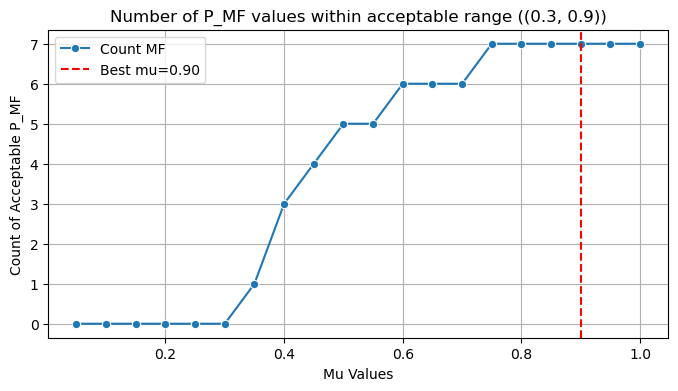

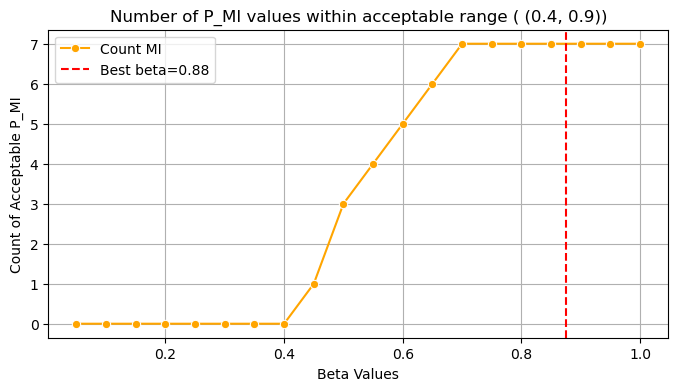

'\n### **Visualization 3: Bar Plot of Risk Probability per Attack using Optimal mu, beta**\ndf["P_MF_optimal"] = best_mu * df["MF"]\ndf["P_MI_optimal"] = best_beta * df["MI"]\n\nplt.figure(figsize=(10, 5))\nsns.barplot(x="attacks", y="P_MF_optimal", data=df, palette="Blues", label="P_MF (Likelihood)")\nsns.barplot(x="attacks", y="P_MI_optimal", data=df, palette="Oranges", alpha=0.7, label="P_MI (Impact)")\n\nplt.xticks(rotation=45, ha="right")\nplt.title(f"Risk Probability (P_MF & P_MI) per Attack using Optimal mu={best_mu:.2f}, beta={best_beta:.2f}")\nplt.ylabel("Risk Probability")\nplt.xlabel("Attack Types")\nplt.legend()\nplt.show()\n'

In [56]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


# Generate values of mu and beta with a step of 0.1
mu_values = np.arange(0.05, 1.05, 0.05)
beta_values = np.arange(0.05, 1.05, 0.05)

# Define separate acceptable likelihood and risk probability ranges
# Given the threat model, the objective here is to get mu and beta values that leads to probabilities of MF and MI between the acceptable ranges
# Note: the threat model assumes any attack can happen, with an average level of security
min_MF, max_MF = 0.3, 0.9
min_MI, max_MI = 0.4, 0.9

# Store results separately for mu and beta
results_MF = []
results_MI = []

# Iterate through mu values (for MF)
for mu in mu_values:
    df["P_MF"] = mu * df["MF"]  # Probability from Likelihood

    # Count how many values fall within the acceptable range
    within_range_MF = ((df["P_MF"] >= min_MF) & (df["P_MF"] <= max_MF)).sum()

    # Store results
    results_MF.append({"mu": mu, "count_MF": within_range_MF})

# Iterate through beta values (for MI)
for beta in beta_values:
    df["P_MI"] = beta * df["MI"]  # Probability from Impact

    # Count how many values fall within the acceptable range
    within_range_MI = ((df["P_MI"] >= min_MI) & (df["P_MI"] <= max_MI)).sum()

    # Store results
    results_MI.append({"beta": beta, "count_MI": within_range_MI})

# Convert results to DataFrames
results_MF_df = pd.DataFrame(results_MF)
results_MI_df = pd.DataFrame(results_MI)

# Find the best mu and beta separately
best_mu = round( np.arange(round(results_MF_df.nlargest(1, "count_MF").iloc[0]["mu"], 3) , 1.05, 0.05).mean(), 3)
best_beta = round( np.arange(round(results_MI_df.nlargest(1, "count_MI").iloc[0]["beta"], 3) , 1.05, 0.05).mean(), 3) 

print(f"Best mu for MF (likelihood) in range {min_MF}-{max_MF}: {best_mu}")
print(f"Best beta for MI (impact) in range {min_MI}-{max_MI}: {best_beta}")

### **Visualization 1: Line Plot for Acceptable MF Count**
plt.figure(figsize=(8, 4))
sns.lineplot(x="mu", y="count_MF", data=results_MF_df, marker="o", label="Count MF")
plt.axvline(best_mu, color="r", linestyle="--", label=f"Best mu={best_mu:.2f}")
plt.title(f"Number of P_MF values within acceptable range ({min_MF, max_MF })")
plt.xlabel("Mu Values")
plt.ylabel("Count of Acceptable P_MF")
plt.legend()
plt.grid()
plt.show()

### **Visualization 2: Line Plot for Acceptable MI Count**
plt.figure(figsize=(8, 4))
sns.lineplot(x="beta", y="count_MI", data=results_MI_df, marker="o", color="orange", label="Count MI")
plt.axvline(best_beta, color="r", linestyle="--", label=f"Best beta={best_beta:.2f}")
plt.title(f"Number of P_MI values within acceptable range ( {min_MI, max_MI })")
plt.xlabel("Beta Values")
plt.ylabel("Count of Acceptable P_MI")
plt.legend()
plt.grid()
plt.show()

'''
### **Visualization 3: Bar Plot of Risk Probability per Attack using Optimal mu, beta**
df["P_MF_optimal"] = best_mu * df["MF"]
df["P_MI_optimal"] = best_beta * df["MI"]

plt.figure(figsize=(10, 5))
sns.barplot(x="attacks", y="P_MF_optimal", data=df, palette="Blues", label="P_MF (Likelihood)")
sns.barplot(x="attacks", y="P_MI_optimal", data=df, palette="Oranges", alpha=0.7, label="P_MI (Impact)")

plt.xticks(rotation=45, ha="right")
plt.title(f"Risk Probability (P_MF & P_MI) per Attack using Optimal mu={best_mu:.2f}, beta={best_beta:.2f}")
plt.ylabel("Risk Probability")
plt.xlabel("Attack Types")
plt.legend()
plt.show()
'''
